In [16]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [19]:
# Use the print() function to display the latitude and longitude combinations. 
for coordinate in coordinates: 
    print(coordinate[0], coordinate[1])

71.47608143663393 -173.37312726697326
85.9929011816406 152.99428947771656
-39.67558050471708 2.6110344849905687
22.870343759479255 -107.55065884722768
56.395354777950985 32.79899994517953
20.650332310892978 40.74148984999735
-55.70777390594383 123.9975764017355
44.00933460976924 -44.884191696949046
-82.56554632420621 99.99483243941717
-7.15853387987039 -96.70295520979776
89.87535324612773 163.77104927217204
-30.396524802620988 -93.14428700353291
-28.347196960014756 27.244495608878708
-56.31859952492831 -109.06378114396958
10.873027678612914 94.52119261482238
-27.705421032360043 51.765133316412545
-68.10886213592772 169.17188023766852
-86.75402181782177 -85.24134352822398
44.41011349288803 -54.378679542072305
64.90070546534011 -174.71080528541484
-87.35081126277578 -140.28851785222946
72.15887624133296 -47.18994453269218
-18.50136930331982 117.64412593894662
3.8355707762909788 -67.95593320084542
87.72343785681934 170.6937781854155
50.49732741765689 160.67441683975267
11.388586130595002 

22.505063187357635 -8.89659532994969
45.56902401779911 54.0986282325878
-40.30764141259165 176.78157709011197
59.765202192655096 35.21088087756587
-84.20476204227901 -127.1169420497856
-61.21849828339704 -116.62983536099824
75.69432766746004 -20.896139447686522
-7.046952767386443 -97.31689927292577
-20.433647460994962 -77.05595580068209
-76.27746400683945 93.55817482999049
26.77931693535693 -143.4713420810613
-58.75760887479926 -12.509179895013375
88.38320577787229 56.869762792426286
-52.71741062265038 37.75870509373976
88.93243759516525 115.31089115909202
20.91144776572048 -35.095899273869975
39.93821929920091 47.951845234541196
12.385698428719763 -120.83319528531763
-44.70212714947438 148.6786734678954
40.378604873804306 -12.083271426631825
-35.577526918692115 -9.971957325750537
-52.20130389003011 -112.19879747799283
50.05108993738935 141.5875749080618
19.48184272798956 15.452506461758247
58.155850357576924 48.410032938928026
-62.51259180238253 166.67260377457956
-67.31472728611328 3

In [20]:
# import the citipy 
from citipy import citipy

In [21]:
# Create a list for holding the cities. 
cities = []
# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count. 
len(cities)

600

In [25]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [28]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=69177ac5ffb49da3524d4005afb836f4


In [29]:
# Import the requests library
import requests

# Import the API key. 
from config import weather_api_key

In [30]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lavrentiya
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | mazatlan
Processing Record 5 of Set 1 | nelidovo
Processing Record 6 of Set 1 | mecca
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | ventersburg
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | port blair
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | marystown
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | port hedland
Processing Record

Processing Record 41 of Set 4 | usmajac
Processing Record 42 of Set 4 | porto novo
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | talaja
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | disna
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | quatre cocos
Processing Record 49 of Set 4 | dunhua
Processing Record 50 of Set 4 | mancio lima
Processing Record 1 of Set 5 | semikarakorsk
Processing Record 2 of Set 5 | sao joao da barra
Processing Record 3 of Set 5 | dubenskiy
City not found. Skipping...
Processing Record 4 of Set 5 | werda
Processing Record 5 of Set 5 | beringovskiy
Processing Record 6 of Set 5 | san quintin
Processing Record 7 of Set 5 | demyanovo
Processing Record 8 of Set 5 | cuamba
Processing Record 9 of Set 5 | beira
Processing Record 10 of Set 5 | pandan
Processing Record 11 of Set 5 | athens
Processing Record 12 of Set 5 | mayumba
Processing Record 13 of Set 5 | barentsburg
City not found. Skipping...

Processing Record 28 of Set 8 | qaqortoq
Processing Record 29 of Set 8 | nyazepetrovsk
Processing Record 30 of Set 8 | tekirdag
Processing Record 31 of Set 8 | nantucket
Processing Record 32 of Set 8 | keti bandar
Processing Record 33 of Set 8 | yashkul
Processing Record 34 of Set 8 | wilmington
Processing Record 35 of Set 8 | dien bien
City not found. Skipping...
Processing Record 36 of Set 8 | yashkino
Processing Record 37 of Set 8 | tual
Processing Record 38 of Set 8 | phalaborwa
Processing Record 39 of Set 8 | huarmey
Processing Record 40 of Set 8 | narasannapeta
Processing Record 41 of Set 8 | saint anthony
Processing Record 42 of Set 8 | santiago del estero
Processing Record 43 of Set 8 | agadez
Processing Record 44 of Set 8 | solnechnyy
Processing Record 45 of Set 8 | chifeng
Processing Record 46 of Set 8 | yumen
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | cerritos
Processing Record 49 of Set 8 | katherine
Processing Record 50 of Set 8 | darhan
Proce

Processing Record 14 of Set 12 | hodosa
Processing Record 15 of Set 12 | longlac
City not found. Skipping...
Processing Record 16 of Set 12 | shache
Processing Record 17 of Set 12 | maymyo
Processing Record 18 of Set 12 | deputatskiy
Processing Record 19 of Set 12 | comodoro rivadavia
Processing Record 20 of Set 12 | omsukchan
Processing Record 21 of Set 12 | bonavista
Processing Record 22 of Set 12 | alice springs
Processing Record 23 of Set 12 | sale
Processing Record 24 of Set 12 | butler
Processing Record 25 of Set 12 | aksarka
Processing Record 26 of Set 12 | abnub
Processing Record 27 of Set 12 | tochio
Processing Record 28 of Set 12 | bud
Processing Record 29 of Set 12 | hambantota
Processing Record 30 of Set 12 | kichmengskiy gorodok
Processing Record 31 of Set 12 | irece
Processing Record 32 of Set 12 | dongsheng
Processing Record 33 of Set 12 | seminole
Processing Record 34 of Set 12 | lasa
Processing Record 35 of Set 12 | toliary
City not found. Skipping...
Processing Record

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lavrentiya,65.5833,-171.0000,37.38,89,92,3.74,RU,2022-05-30 19:00:31
1,Chokurdakh,70.6333,147.9167,32.99,82,82,10.49,RU,2022-05-30 19:00:31
2,Saldanha,-33.0117,17.9442,56.93,69,1,4.83,ZA,2022-05-30 19:00:31
3,Mazatlan,23.2167,-106.4167,87.03,77,6,5.01,MX,2022-05-30 18:56:09
4,Nelidovo,56.2211,32.7774,51.87,86,100,5.50,RU,2022-05-30 19:00:32
5,Mecca,21.4267,39.8261,90.70,20,2,6.89,SA,2022-05-30 19:00:02
6,Albany,42.6001,-73.9662,87.58,49,45,7.29,US,2022-05-30 19:00:32
7,Torbay,47.6666,-52.7314,66.27,72,36,5.01,CA,2022-05-30 19:00:32
8,Puerto Ayora,-0.7393,-90.3518,74.16,80,87,9.78,EC,2022-05-30 19:00:33
9,Pevek,69.7008,170.3133,33.87,83,100,1.63,RU,2022-05-30 19:00:33


In [33]:
re_order_citydata_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[re_order_citydata_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lavrentiya,RU,2022-05-30 19:00:31,65.5833,-171.0000,37.38,89,92,3.74
1,Chokurdakh,RU,2022-05-30 19:00:31,70.6333,147.9167,32.99,82,82,10.49
2,Saldanha,ZA,2022-05-30 19:00:31,-33.0117,17.9442,56.93,69,1,4.83
3,Mazatlan,MX,2022-05-30 18:56:09,23.2167,-106.4167,87.03,77,6,5.01
4,Nelidovo,RU,2022-05-30 19:00:32,56.2211,32.7774,51.87,86,100,5.50
5,Mecca,SA,2022-05-30 19:00:02,21.4267,39.8261,90.70,20,2,6.89
6,Albany,US,2022-05-30 19:00:32,42.6001,-73.9662,87.58,49,45,7.29
7,Torbay,CA,2022-05-30 19:00:32,47.6666,-52.7314,66.27,72,36,5.01
8,Puerto Ayora,EC,2022-05-30 19:00:33,-0.7393,-90.3518,74.16,80,87,9.78
9,Pevek,RU,2022-05-30 19:00:33,69.7008,170.3133,33.87,83,100,1.63


In [37]:
#Create the output file (CSV). 
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

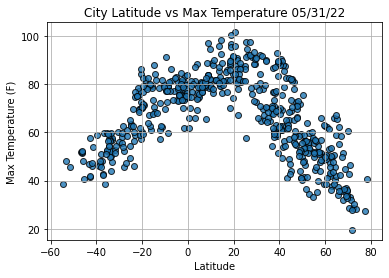

In [42]:
# import the time module
import time

# Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties. 
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure. 
plt.savefig("weather_data/Fig1.png")

# show plot. 
plt.show()

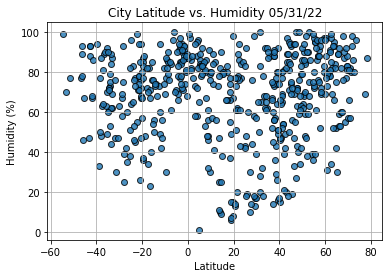

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

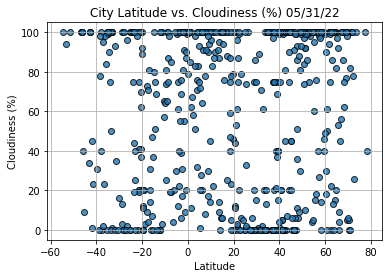

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

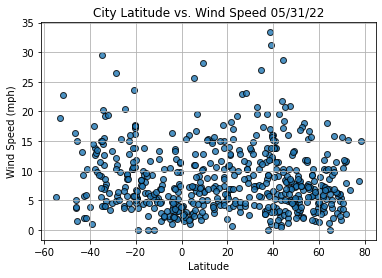

In [47]:
# Build the scatter plots for latitude vs. wind speed. 
plt.scatter(lats, wind_speed, edgecolor="black", 
            linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties. 
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()